In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from matplotlib.ticker import FuncFormatter 
#This will be used to create the pre planned events icon
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox) 
from matplotlib._png import read_png 
from matplotlib.patches import Ellipse
import matplotlib.mlab as mlab
%matplotlib inline
import plotly.plotly as py
import seaborn as sns
import xml.etree.ElementTree as ET
import geopy.distance
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import datetime
import time
from numpy.random import randn
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt 
%matplotlib inline 
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [2]:
path ='Datasets/Trips_Data/2017TripsData/'

trips_2017 = glob.glob(path + "/*.csv")
trips_data_frame = pd.DataFrame()
columns_name = ['rental_id','duration','bike_id','end_date','end_station_id','end_station_name','start_date',
             'start_station_id','start_station_name']
data_frame_lists = []

columns=list(range(9))
for read_trip in trips_2017:
    
    data_frame = pd.read_csv(read_trip,names=columns_name,usecols=columns,header=0, engine='python',
                     parse_dates=['start_date'],dayfirst=True,infer_datetime_format=True)
    data_frame_lists.append(data_frame)
trips_data_frame=pd.concat(data_frame_lists,ignore_index=True)
trips_data_frame = trips_data_frame.dropna(axis=0, how='any')
trips_data_frame = trips_data_frame.reset_index(drop=True)
# trips_data_frame['hour'] = trips_data_frame['start_date'].dt.hour
# trips_data_frame['day'] = trips_data_frame['start_date'].dt.day
# trips_data_frame['month'] = trips_data_frame['start_date'].dt.month
# trips_data_frame['year'] = trips_data_frame['start_date'].dt.year
# trips_data_frame['quarter'] = trips_data_frame['start_date'].dt.quarter
# trips_data_frame['day_of_week'] = trips_data_frame['start_date'].dt.dayofweek
# trips_data_frame['weekday'] = trips_data_frame['start_date'].dt.weekday
trips_data_frame.head(12)


,rental_id,duration,bike_id,end_date,end_station_id,end_station_name,start_date,start_station_id,start_station_name
0,71414840,780.0,6324.0,16/11/2017 17:49,173.0,"Waterloo Road, South Bank",2017-11-16 17:36:00,199,"Great Tower Street, Monument"
1,71364210,300.0,15155.0,15/11/2017 08:08,24.0,"British Museum, Bloomsbury",2017-11-15 08:03:00,65,"Gower Place , Euston"
2,71458500,720.0,9436.0,18/11/2017 10:49,206.0,"New Road 1 , Whitechapel",2017-11-18 10:37:00,565,"Selby Street, Whitechapel"
3,71521376,1320.0,5151.0,21/11/2017 09:05,359.0,"Butler Place, Westminster",2017-11-21 08:43:00,701,"Vicarage Crescent, Battersea"
4,71489373,780.0,1270.0,20/11/2017 07:55,610.0,"Danvers Street, West Chelsea",2017-11-20 07:42:00,665,"Smugglers Way, Wandsworth"
5,71455551,360.0,7066.0,18/11/2017 02:49,24.0,"British Museum, Bloomsbury",2017-11-18 02:43:00,214,"Endsleigh Gardens, Euston"
6,71474318,1200.0,11946.0,19/11/2017 12:52,356.0,"South Kensington Station, South Kensington",2017-11-19 12:32:00,616,"Aintree Street, Fulham"
7,71493455,480.0,13205.0,20/11/2017 08:57,24.0,"British Museum, Bloomsbury",2017-11-20 08:49:00,14,"Belgrove Street , King's Cross"
8,71437069,300.0,8645.0,17/11/2017 12:24,88.0,"Bayley Street , Bloomsbury",2017-11-17 12:19:00,116,"Little Argyll Street, West End"
9,71362314,1560.0,9720.0,15/11/2017 07:50,556.0,"Heron Quays DLR, Canary Wharf",2017-11-15 07:24:00,314,"Tyers Gate, Bermondsey"


In [3]:
path ='Datasets/Weather_Data/2017_weather/'
weather_2017 = glob.glob(path + "/*.csv")
weather_data_frame = pd.DataFrame()
weather_columns_name = ['Date','rain_acc','air_temperature','Quality_flag','horizontal_wind_speed','relative_humidity','wind_direction']
weather_data_frame_lists = []

weather_columns=list(range(7))
for read_weather in weather_2017:
    
    data_frame = pd.read_csv(read_weather,names=weather_columns_name,usecols=weather_columns,header=0, engine='python',
                     parse_dates=['Date'],dayfirst=True,infer_datetime_format=True)
    weather_data_frame_lists.append(data_frame)
weather_data_frame=pd.concat(weather_data_frame_lists,ignore_index=True)
#weather_data_frame = weather_data_frame.dropna(axis=0, how='any')
weather_data_frame = weather_data_frame.reset_index(drop=True)
weather_data_frame['Date'] = weather_data_frame['Date'].astype('datetime64[ns]')
#weather_data_frame.fillna(value=0.0, inplace=True)
weather_data_frame['rain_acc'] = weather_data_frame['rain_acc'].convert_objects(convert_numeric=True)
weather_data_frame.fillna(method='ffill', inplace=True)
weather_data_frame['air_temperature'] = weather_data_frame['air_temperature'].convert_objects(convert_numeric=True)
weather_data_frame['horizontal_wind_speed'] = weather_data_frame['horizontal_wind_speed'].convert_objects(convert_numeric=True)
weather_data_frame['relative_humidity'] = weather_data_frame['relative_humidity'].convert_objects(convert_numeric=True)
weather_data_frame['wind_direction'] = weather_data_frame['wind_direction'].convert_objects(convert_numeric=True)
weather_data_frame.head()

,Date,rain_acc,air_temperature,Quality_flag,horizontal_wind_speed,relative_humidity,wind_direction
0,2017-06-01 00:00:00,0.0,16.071333,NaN,1.004600,78.414667,215.953333
1,2017-06-01 00:15:00,0.0,15.992667,NaN,0.878133,78.797333,200.360000
2,2017-06-01 00:30:00,0.0,15.854000,NaN,0.941200,79.302667,199.573333
3,2017-06-01 00:45:00,0.0,15.570000,NaN,1.158667,80.061333,191.593333
4,2017-06-01 01:00:00,0.0,15.391333,NaN,1.354800,81.213333,198.646667


In [4]:
weather_data_frame.air_temperature.isnull().values.any()

False

In [5]:
daily_riders = pd.DataFrame(trips_data_frame.groupby('start_date').size().reset_index(name='rides'))

merged=  pd.merge(daily_riders, weather_data_frame, left_on=['start_date'], right_on=['Date'])
merged = merged[['Date','rides','rain_acc','air_temperature','relative_humidity']]
merged['day_of_week'] = merged['Date'].dt.dayofweek
merged['hour'] = merged['Date'].dt.hour
merged['day'] = merged['Date'].dt.day
merged['month'] = merged['Date'].dt.month
#merged['year'] = merged['Date'].dt.year
#merged['quarter'] = merged['Date'].dt.quarter
merged['weekday'] = merged['Date'].dt.weekday
peak = pd.Series(merged['hour'])
merged['peak_hour'] = peak.isin([7, 8, 9, 16,17, 18, 19]).astype(int)

#test_df['peak_hour'] = peak.isin([7, 8, 9, 17, 18, 19]).astype(int)
merged.head(10)

,Date,rides,rain_acc,air_temperature,relative_humidity,day_of_week,hour,day,month,weekday,peak_hour
0,2017-01-01 00:15:00,30,0.0,7.407333,76.416667,6,0,1,1,6,0
1,2017-01-01 00:30:00,34,0.0,7.424267,76.412000,6,0,1,1,6,0
2,2017-01-01 00:45:00,18,0.0,7.376733,75.746000,6,0,1,1,6,0
3,2017-01-01 01:00:00,40,0.0,7.257800,75.681333,6,1,1,1,6,0
4,2017-01-01 01:15:00,44,0.0,7.043333,76.319333,6,1,1,1,6,0
5,2017-01-01 01:30:00,44,0.0,6.898267,76.308000,6,1,1,1,6,0
6,2017-01-01 01:45:00,8,0.0,6.741933,76.700000,6,1,1,1,6,0
7,2017-01-01 02:00:00,12,0.0,6.622400,77.878000,6,2,1,1,6,0
8,2017-01-01 02:15:00,10,0.0,6.613000,78.151333,6,2,1,1,6,0
9,2017-01-01 02:30:00,2,0.0,6.578467,76.259333,6,2,1,1,6,0


In [6]:
feature_train = merged.drop(['Date','rides'], axis = 1)
feature_train.head()

,rain_acc,air_temperature,relative_humidity,day_of_week,hour,day,month,weekday,peak_hour
0,0.0,7.407333,76.416667,6,0,1,1,6,0
1,0.0,7.424267,76.412000,6,0,1,1,6,0
2,0.0,7.376733,75.746000,6,0,1,1,6,0
3,0.0,7.257800,75.681333,6,1,1,1,6,0
4,0.0,7.043333,76.319333,6,1,1,1,6,0


In [7]:
encode_oneHot = preprocessing.OneHotEncoder()
encoded = encode_oneHot.fit_transform(feature_train[['day_of_week',  'month', 'day', 'hour', 'weekday', 'peak_hour']]).toarray()
scaled = preprocessing.scale(feature_train[['air_temperature','relative_humidity']].values) 
feature_trans = np.concatenate([encoded, scaled], axis =1)
feat= ['day_of_week', 'month', 'day', 'hour', 'weekday', 'peak_hour','air_temperature','relative_humidity']
print ("encoded categorical data",'\n', encoded, np.shape(encoded), '\n') 
print ("scaled numeric data", '\n', scaled, np.shape(scaled), '\n')
print ("transformed data", '\n', feature_trans, np.shape(feature_trans), '\n')
print ("selected features: ", '\n', feat)

encoded categorical data 
 [[ 0.  0.  0. ...,  1.  1.  0.]
 [ 0.  0.  0. ...,  1.  1.  0.]
 [ 0.  0.  0. ...,  1.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  1.  0.]
 [ 0.  0.  0. ...,  1.  1.  0.]
 [ 0.  0.  0. ...,  1.  1.  0.]] (30917, 83) 

scaled numeric data 
 [[-0.89290692  0.28192512]
 [-0.88997569  0.28160459]
 [-0.89820392  0.23586002]
 ..., 
 [-0.86845303  0.12587158]
 [-0.86736824  0.15027784]
 [-0.8642639   0.14675198]] (30917, 2) 

transformed data 
 [[ 0.          0.          0.         ...,  0.         -0.89290692
   0.28192512]
 [ 0.          0.          0.         ...,  0.         -0.88997569
   0.28160459]
 [ 0.          0.          0.         ...,  0.         -0.89820392
   0.23586002]
 ..., 
 [ 0.          0.          0.         ...,  0.         -0.86845303
   0.12587158]
 [ 0.          0.          0.         ...,  0.         -0.86736824
   0.15027784]
 [ 0.          0.          0.         ...,  0.         -0.8642639
   0.14675198]] (30917, 85) 

selected features:  
 

In [8]:
target = merged['rides']
training_data, testing_data, training_target, testing_target = train_test_split (feature_trans, target, test_size = 0.1, random_state = 2000)
print ("train_data", training_data.shape,'\n', training_data, '\n')
print ('test_data', testing_data.shape, '\n', testing_data)

train_data (27825, 85) 
 [[ 0.          1.          0.         ...,  0.          0.82694387
  -1.03303665]
 [ 0.          0.          0.         ...,  0.          0.66411025
   0.42327996]
 [ 0.          0.          0.         ...,  1.         -1.07579759
   0.64939276]
 ..., 
 [ 0.          0.          1.         ...,  0.         -0.96076388
   1.6467068 ]
 [ 1.          0.          0.         ...,  0.         -2.09033991
  -0.16672883]
 [ 0.          0.          0.         ...,  0.         -0.27630874
  -1.41648512]] 

test_data (3092, 85) 
 [[ 0.          0.          0.         ...,  0.          0.97015898
   0.00567188]
 [ 0.          0.          0.         ...,  0.          0.79093813
  -0.68054246]
 [ 0.          0.          0.         ...,  0.         -0.53619628
   0.64893486]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.06378388
  -0.2257526 ]
 [ 0.          0.          0.         ...,  0.         -0.13644031
   0.79088497]
 [ 0.          0.          0.    

In [9]:
RandomForestRegressor_model = RandomForestRegressor(random_state = 0, max_depth = 30, n_estimators = 500)
RandomForestRegressor_model.fit(training_data, training_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [10]:
mean_squared_error(testing_target, RandomForestRegressor_model.predict(testing_data))

56.870677742914815

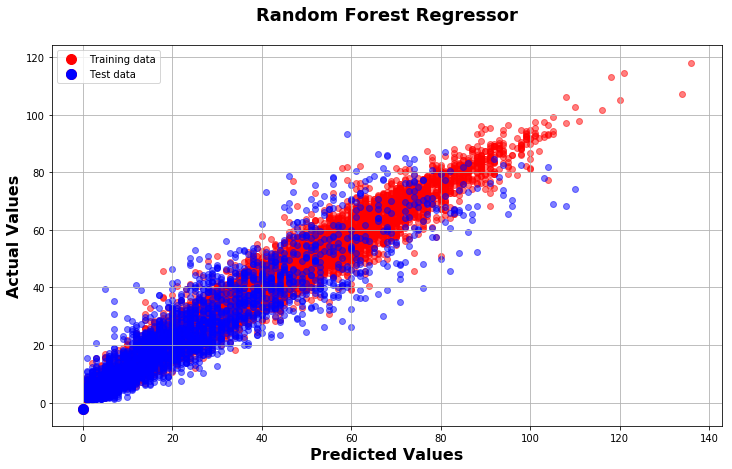

In [11]:
fig, axes = plt.subplots(figsize = (12, 7))
axes.grid(True)
axes.scatter(training_target, RandomForestRegressor_model.predict(training_data), alpha = 0.5, color = 'red')
axes.scatter(testing_target, RandomForestRegressor_model.predict(testing_data), alpha = 0.5, color = 'blue')
plt.title('Random Forest Regressor',fontsize=18, fontweight='bold')
circle = randn(1)
red_dot, = plt.plot(circle, "ro", markersize=10)
blue_dot, = plt.plot(circle, "bo", markersize=10) 
gap = axes.title
gap.set_position([.5, 1.05])
plt.xlabel('Predicted Values', fontsize=16, fontweight='bold')
plt.ylabel('Actual Values', fontsize=16, fontweight='bold')
plt.legend([red_dot, (red_dot, blue_dot)], ["Training data", "Test data"])

In [12]:
gradientBoostingRegressor_model = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.8, max_depth = 30)
gradientBoostingRegressor_model.fit(training_data, training_target)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.8, loss='ls', max_depth=30, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [13]:
mean_squared_error(testing_target, gradientBoostingRegressor_model.predict(testing_data))

86.371593892183128

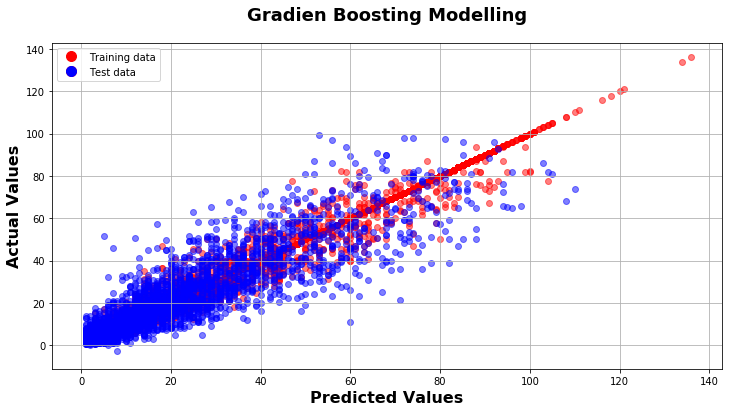

In [14]:
fig, axes = plt.subplots(figsize = (12, 6))
axes.grid(True)
axes.scatter(training_target, gradientBoostingRegressor_model.predict(training_data), alpha = 0.5, color = 'red')
axes.scatter(testing_target, gradientBoostingRegressor_model.predict(testing_data), alpha = 0.5, color = 'blue')
plt.title('Gradien Boosting Modelling', fontsize=18, fontweight='bold')
gap = axes.title
gap.set_position([.5, 1.05])
plt.xlabel('Predicted Values', fontsize=16, fontweight='bold')
plt.ylabel('Actual Values', fontsize=16, fontweight='bold')
plt.legend([red_dot, (red_dot, blue_dot)], ["Training data", "Test data"])

In [15]:
SVR_model = SVR(C = 1e3, epsilon = 0.25, kernel = 'rbf', gamma = 0.1)
SVR_model.fit(training_data,training_target) 

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.25, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [16]:
mean_squared_error(testing_target, SVR_model.predict(testing_data))

64.021602049714673

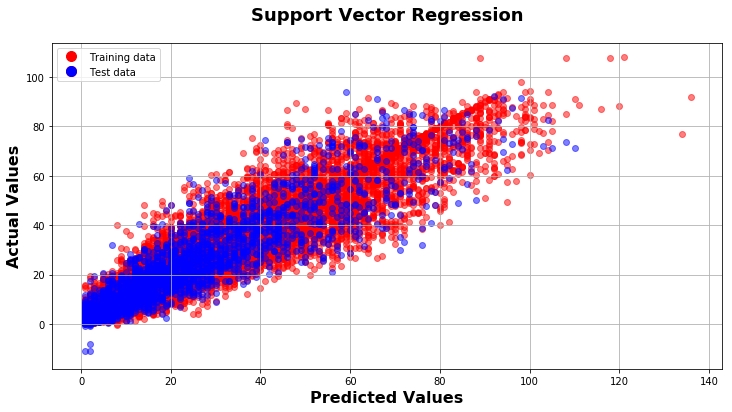

In [17]:
fig, axes = plt.subplots(figsize = (12, 6))
axes.grid(True)
axes.scatter(training_target, SVR_model.predict(training_data), alpha = 0.5, color = 'red')
axes.scatter(testing_target, SVR_model.predict(testing_data), alpha = 0.5, color = 'blue')
plt.title('Support Vector Regression', fontsize=18, fontweight='bold')
gap = axes.title
gap.set_position([.5, 1.05])
plt.xlabel('Predicted Values', fontsize=16, fontweight='bold')
plt.ylabel('Actual Values', fontsize=16, fontweight='bold')
plt.legend([red_dot, (red_dot, blue_dot)], ["Training data", "Test data"])

In [18]:
kNeighborsRegressor_model = KNeighborsRegressor()
kNeighborsRegressor_model.fit(training_data,training_target) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [19]:
mean_squared_error(testing_target, kNeighborsRegressor_model.predict(testing_data))

81.172328589909455

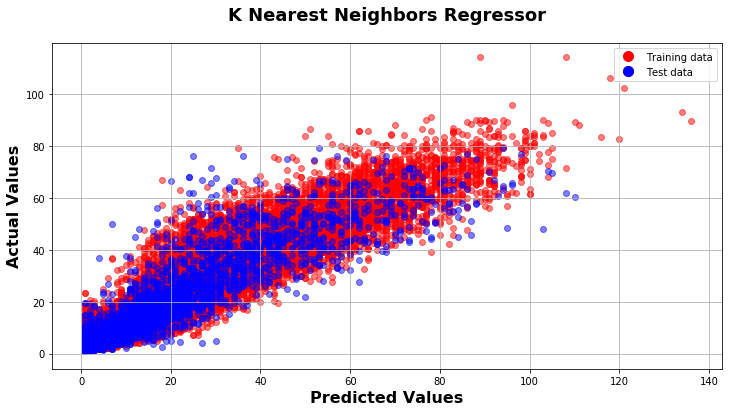

In [21]:
fig, axes = plt.subplots(figsize = (12, 6))
axes.grid(True)
axes.scatter(training_target, kNeighborsRegressor_model.predict(training_data), alpha = 0.5, color = 'red')
axes.scatter(testing_target, kNeighborsRegressor_model.predict(testing_data), alpha = 0.5, color = 'blue')
plt.title('K Nearest Neighbors Regressor', fontsize=18, fontweight='bold')
gap = axes.title
gap.set_position([.5, 1.05])
plt.xlabel('Predicted Values', fontsize=16, fontweight='bold')
plt.ylabel('Actual Values', fontsize=16, fontweight='bold')
plt.legend([red_dot, (red_dot, blue_dot)], ["Training data", "Test data"])

In [22]:
mean_squared_error(testing_target, kNeighborsRegressor_model.predict(testing_data))

81.172328589909455

In [23]:
r2_score(testing_target, kNeighborsRegressor_model.predict(testing_data), multioutput='variance_weighted')

0.7893526712094705